In [ ]:
#load dataset
#standarize data
#calculate convariation matrix
#calculate eigenvalues and eigenvectors of covariance matrix
#data transformation
#plot the data

import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

db = datasets.load_diabetes()
db_data = pd.DataFrame(data=db.data, columns=db.feature_names)

scaler = StandardScaler()
db_data_scaled = scaler.fit_transform(db_data)
db_data_scaled_df = pd.DataFrame(db_data_scaled, columns=db.feature_names)
print("Data standardized using Scikit-learn's StandardScaler:")
print(db_data_scaled_df.head())

cov_matrix=np.cov(db_data_scaled_df.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)



Data standardized using Scikit-learn's StandardScaler:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   

         s4        s5        s6  
0 -0.054499  0.418531 -0.370989  
1 -0.830301 -1.436589 -1.938479  
2 -0.054499  0.060156 -0.545154  
3  0.721302  0.476983 -0.196823  
4 -0.054499 -0.672502 -0.980568  
            0         1         2         3         4         5         6  \
0    0.153573  0.075802  0.074572  0.020946 -0.000379 -0.002733 -0.028804   
1   -0.007591 -0.066771 -0.062217 -0.025212 -0.000072 -0.001504  0.049386   
2    0.344039  0.075802  0.053728 -0.005430 -0.000391 -0.00

[[-5.87199129e-01  1.94683220e+00]
 [ 2.83162538e+00 -1.37208173e+00]
 [-2.72128549e-01  1.63490124e+00]
 [-4.92811447e-02 -3.82278029e-01]
 [ 7.56421355e-01 -8.11960246e-01]
 [ 3.96632094e+00  3.81060110e-01]
 [ 1.99381728e+00  8.05533094e-01]
 [-2.07586679e+00 -1.82790486e+00]
 [-6.03010049e-01  8.81245906e-01]
 [ 2.12142303e-01  4.92889267e-01]
 [ 3.85620452e+00  1.53208525e+00]
 [-3.96911264e-01  6.32534772e-01]
 [ 1.59635877e+00 -9.81463428e-01]
 [-3.18460780e-01  6.51091260e-01]
 [ 1.68543640e+00 -1.81793194e+00]
 [-2.95362637e+00 -9.50066264e-01]
 [-1.59459664e-01 -9.12303004e-01]
 [-2.28818146e+00  1.48606265e-01]
 [ 1.15615929e+00  4.28300555e-01]
 [ 1.77156480e+00 -9.28850469e-01]
 [ 2.00974666e+00  2.90000932e-01]
 [ 1.93153274e+00  8.31328161e-01]
 [ 1.67615322e+00 -7.19679514e-01]
 [-3.77353855e+00  1.76440003e+00]
 [ 1.28959110e+00  2.49442756e-01]
 [-8.24742069e-02  1.07392878e+00]
 [ 3.88578573e+00  9.83647233e-01]
 [ 1.04481675e+00  5.53174050e-01]
 [ 1.75926022e+00  6

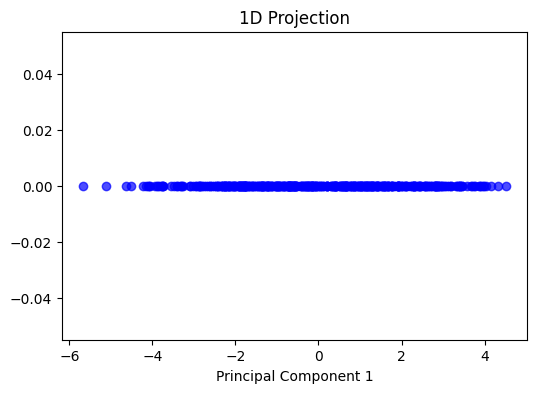

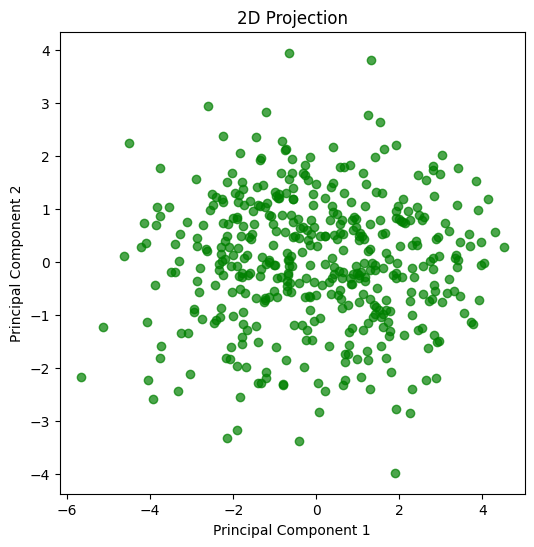

[[-0.58719913  1.9468322  -0.58920548]
 [ 2.83162538 -1.37208173 -0.02792987]
 [-0.27212855  1.63490124 -0.73924374]
 ...
 [ 0.20520638  1.20548723 -0.4961862 ]
 [-0.69287112 -0.2101271   0.86872416]
 [ 1.90394067 -3.97577657  0.04833791]]


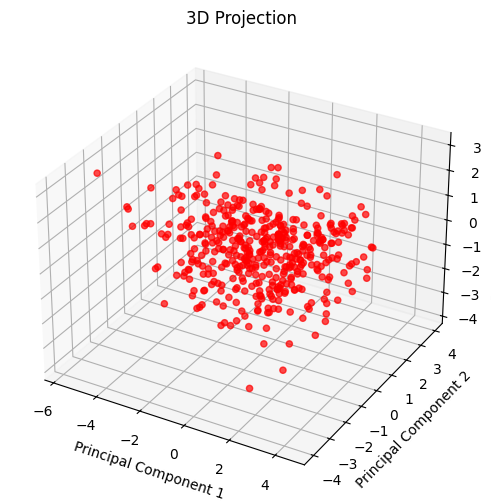

In [6]:
Z=db_data@eigenvectors 


sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select top k eigenvectors
k = 2  # Example: Reduce to 2 dimensions
eigenvectors_reduced = eigenvectors[:, :k]
Z_reduced = db_data_scaled @ eigenvectors_reduced
print(Z_reduced)

plt.figure(figsize=(6, 4))
plt.scatter(Z_reduced[:, 0], np.zeros_like(Z_reduced[:, 0]), alpha=0.7, c='blue')
plt.title("1D Projection")
plt.xlabel("Principal Component 1")
plt.show()

# 2D Plot
plt.figure(figsize=(6, 6))
plt.scatter(Z_reduced[:, 0], Z_reduced[:, 1], alpha=0.7, c='green')
plt.title("2D Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

k = 3  # Example: Reduce to 2 dimensions
eigenvectors_reduced = eigenvectors[:, :k]
Z_reduced = db_data_scaled @ eigenvectors_reduced
print(Z_reduced)
# 3D Plot (if k=3)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z_reduced[:, 0], Z_reduced[:, 1], Z_reduced[:, 2], alpha=0.7, c='red')
ax.set_title("3D Projection")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()